In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_excel('/content/whole_merged_properly.xlsx')

In [ ]:
df.head()

,DateTime,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW)
0,2019-01-01 01:00:00.000,10.926,0.979103,9.014,33.6881
1,2019-01-01 02:00:00.000,9.919,0.979566,9.428,37.2619
2,2019-01-01 03:00:00.005,8.567,0.979937,8.700,30.5029
3,2019-01-01 04:00:00.010,7.877,0.980053,8.481,28.4192
4,2019-01-01 05:00:00.015,7.259,0.979867,8.383,27.3703


In [ ]:
df.columns

Index(['DateTime', 'Air temperature | (°C)', 'Pressure | (atm)',
       'Wind speed | (m/s)', 'Power generated by system | (MW)'],
      dtype='object')

In [ ]:
df.shape

(43823, 5)

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

In [ ]:
df.head()

,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW)
DateTime,,,,
2019-01-01 01:00:00.000,10.926,0.979103,9.014,33.6881
2019-01-01 02:00:00.000,9.919,0.979566,9.428,37.2619
2019-01-01 03:00:00.005,8.567,0.979937,8.700,30.5029
2019-01-01 04:00:00.010,7.877,0.980053,8.481,28.4192
2019-01-01 05:00:00.015,7.259,0.979867,8.383,27.3703


#### EDA

In [ ]:
def plot_time_series(df):
    plt.figure(figsize=(14, 8))

    # Air temperature plot
    plt.subplot(2, 2, 1)
    plt.plot(df.index, df['Air temperature | (°C)'], label='Air temperature (°C)')
    plt.title('Air Temperature Over Time')
    plt.xlabel('DateTime')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)

    # Pressure plot
    plt.subplot(2, 2, 2)
    plt.plot(df.index, df['Pressure | (atm)'], label='Pressure (atm)', color='orange')
    plt.title('Pressure Over Time')
    plt.xlabel('DateTime')
    plt.ylabel('Pressure (atm)')
    plt.grid(True)

    # Wind speed plot
    plt.subplot(2, 2, 3)
    plt.plot(df.index, df['Wind speed | (m/s)'], label='Wind Speed (m/s)', color='green')
    plt.title('Wind Speed Over Time')
    plt.xlabel('DateTime')
    plt.ylabel('Wind Speed (m/s)')
    plt.grid(True)

    # Power generated plot
    plt.subplot(2, 2, 4)
    plt.plot(df.index, df['Power generated by system | (MW)'], label='Power (MW)', color='red')
    plt.title('Power Generated by System Over Time')
    plt.xlabel('DateTime')
    plt.ylabel('Power Generated (MW)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(8, 6))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

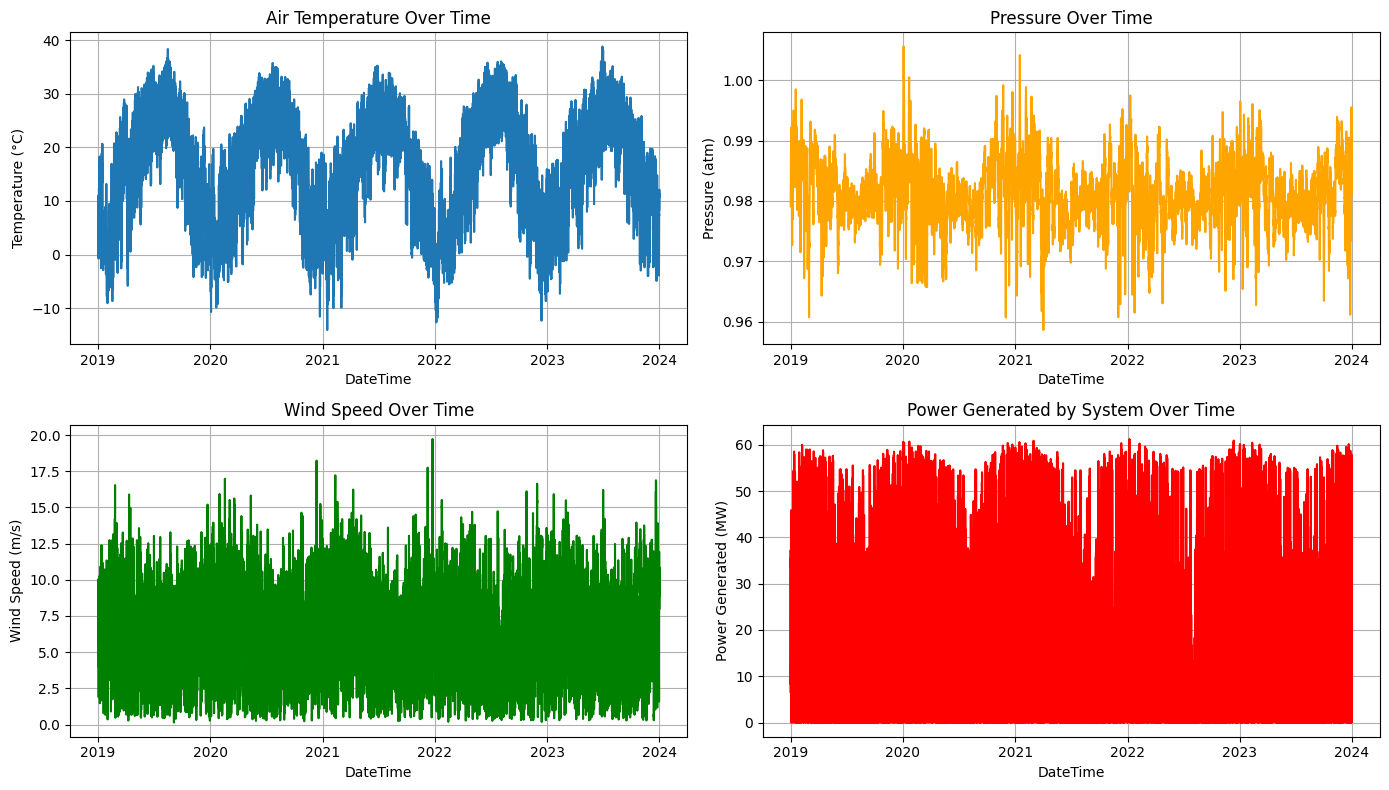

In [ ]:
plot_time_series(df)

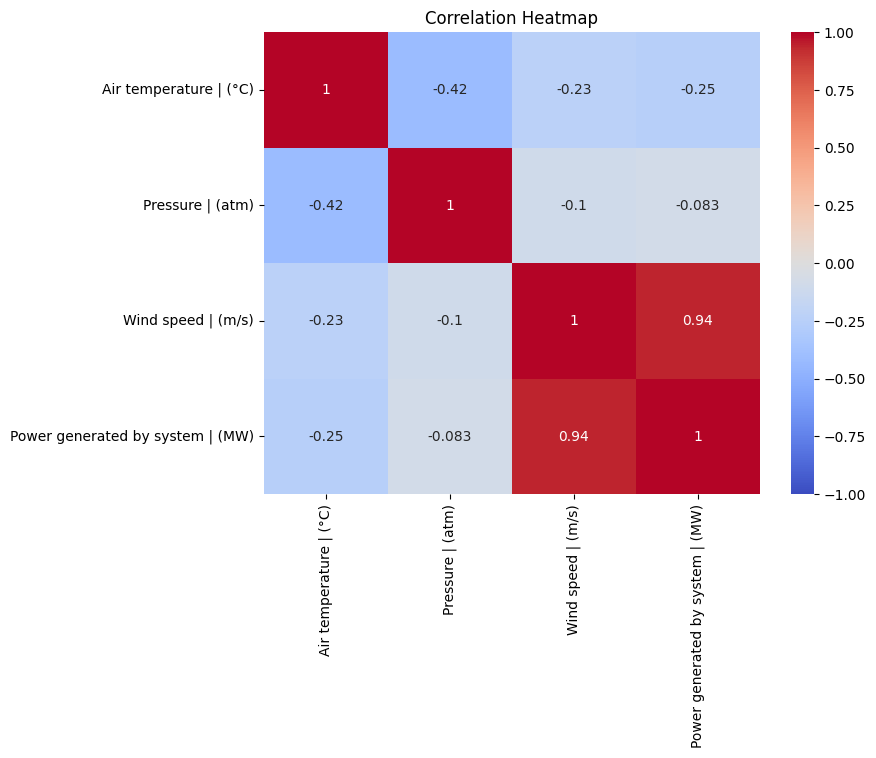

In [ ]:
plot_correlation_heatmap(df)

#### Data Cleaning

In [ ]:
df.isnull().sum()

,0
Air temperature | (°C),0
Pressure | (atm),0
Wind speed | (m/s),0
Power generated by system | (MW),0


In [ ]:
df.index.to_series().diff().value_counts().head()

,count
DateTime,
0 days 01:00:00,43620
0 days 01:00:00.005000,200
0 days 00:59:59.500000,2


If there are any missing values, it will propagate the last valid observation forward to fill in the gaps.

In [ ]:
def handle_missing_values(df):
    df.fillna(method='ffill', inplace=True)
    return df

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    if result[1] < 0.05:
        print("The time series is stationary")
    else:
        print("The time series is not stationary")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Log transformation (to reduce heteroscedasticity)
def log_transform(timeseries):
    return np.log(timeseries)

def differencing(timeseries, order=1):
    return timeseries.diff(periods=order).dropna()

# Scaling the data (Min-Max Scaling)
def scale_data(timeseries):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(timeseries.values.reshape(-1, 1))
    return scaled_data, scaler


df = handle_missing_values(df)
print("ADF Test before transformation:")
adf_test(df['Power generated by system | (MW)'])

ADF Test before transformation:
ADF Statistic: -21.21153899144535
p-value: 0.0
Critical Value 1%: -3.430499403352111
Critical Value 5%: -2.8616060330062463
Critical Value 10%: -2.5668051472213618
The time series is stationary


From the **ADF test** on "Power generated by system | (MW)," we found that the time series is **stationary** because:

- The **ADF statistic** is significantly lower than the critical values.
- The **p-value** is 0.0, indicating strong evidence against the presence of a unit root.

This means the data doesn't exhibit trends or seasonality and is stable over time, making it suitable for further modeling without needing transformations like differencing.

<Figure size 1200x600 with 0 Axes>

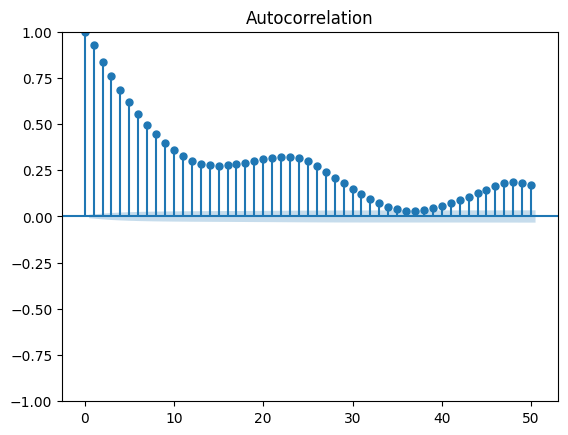

<Figure size 1200x600 with 0 Axes>

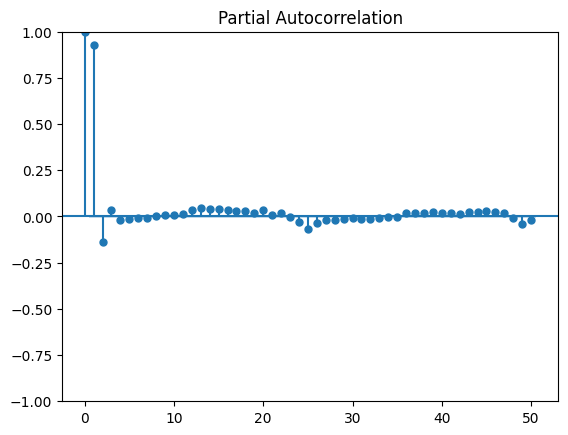

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['Power generated by system | (MW)'], lags=50)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Power generated by system | (MW)'], lags=50)
plt.show()

The ACF plot shows significant autocorrelation at many lags, indicating strong influence from past values, while the PACF plot reveals fewer significant lags, suggesting a shorter memory for direct influences.

Model Selection: Based on ACF and PACF plots fitting an ARIMA model with a higher AR term and a lower MA term could be a good choice. The number of significant lags from the ACF could help determine the AR order, while the PACF can guide the MA order.

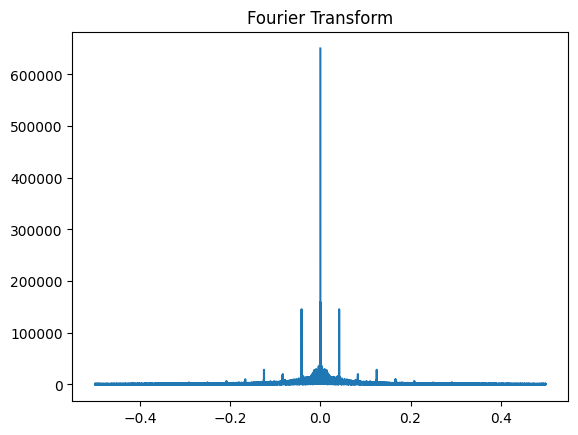

In [ ]:
# FFT to detect any periodic components
fft = np.fft.fft(df['Power generated by system | (MW)'])
frequencies = np.fft.fftfreq(len(df['Power generated by system | (MW)']))

# magnitude of the FFT
plt.plot(frequencies, np.abs(fft))
plt.title('Fourier Transform')
plt.show()


The peak frequency at 0 indicates a strong DC component (mean level around which the data oscillates), reflecting high average power generation, while the absence of significant higher frequencies suggests stable, long-term trends without rapid fluctuations.

In [ ]:
mean_value = df['Power generated by system | (MW)'].mean()
std_dev = df['Power generated by system | (MW)'].std()

print(f'Mean: {mean_value}')
print(f'Standard Deviation: {std_dev}')

Mean: 14.834044952794196
Standard Deviation: 17.234998035850083


#### Model Selection

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

target = df['Power generated by system | (MW)']
exog = df[['Air temperature | (°C)', 'Wind speed | (m/s)']]

train_size = int(len(target) * 0.8)
train_target, test_target = target[:train_size], target[train_size:]
train_exog, test_exog = exog[:train_size], exog[train_size:]

model = ARIMA(train_target, exog=train_exog, order=(1, 0, 1))
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_target), end=len(target) - 1, exog=test_exog)

rmse = np.sqrt(mean_squared_error(test_target, predictions))
print(f'RMSE: {rmse}')

r2 = r2_score(test_target, predictions)
print(f'R² Score: {r2}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RMSE: 5.735783220914054
R² Score: 0.8910415243801755


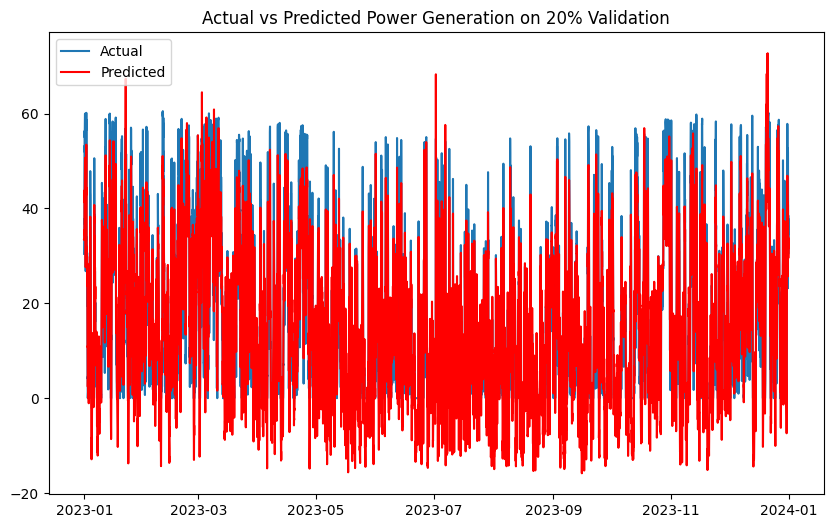

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_target.index, test_target, label='Actual')
plt.plot(test_target.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Power Generation on 20% Validation')
plt.legend()
plt.show()

In [ ]:
df2 = pd.read_csv("/content/wind_power_gen_3months_validation_data.csv")

In [ ]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'])
df2.set_index('DateTime', inplace=True)

In [ ]:
df.columns

Index(['Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)',
       'Power generated by system | (MW)'],
      dtype='object')

In [ ]:
df2.columns

Index(['Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)',
       'Power generated by system | (MW)'],
      dtype='object')

In [ ]:
df2.head()

,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW)
DateTime,,,,
2024-01-01 00:00:00,6.609,0.988077,10.868,53.1810
2024-01-01 01:00:00,5.257,0.988969,10.679,51.9083
2024-01-01 02:00:00,4.374,0.989708,11.200,56.3540
2024-01-01 03:00:00,2.913,0.990171,10.962,54.9368
2024-01-01 04:00:00,1.152,0.990264,11.307,57.7431


In [ ]:
df2.tail()

,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW)
DateTime,,,,
2024-03-31 19:00:00,27.835,0.973886,4.855,3.49390
2024-03-31 20:00:00,28.390,0.973506,6.066,8.96133
2024-03-31 21:00:00,28.487,0.973034,7.075,15.10510
2024-03-31 22:00:00,28.555,0.972540,6.892,13.70680
2024-03-31 23:00:00,27.944,0.972353,6.785,12.94460


In [ ]:
df.tail()

,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW)
DateTime,,,,
2023-12-31 19:00:00,11.713,0.985015,8.703,30.4221
2023-12-31 20:00:00,12.115,0.985244,8.854,32.0366
2023-12-31 21:00:00,11.856,0.985639,9.333,36.3990
2023-12-31 22:00:00,10.761,0.986212,9.457,37.7404
2023-12-31 23:00:00,8.380,0.987183,9.324,36.7908


In [ ]:
df.shape

(43823, 4)

In [ ]:
df2.shape

(2184, 4)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 19.213986069084367
R² Score: -0.22267351056949702


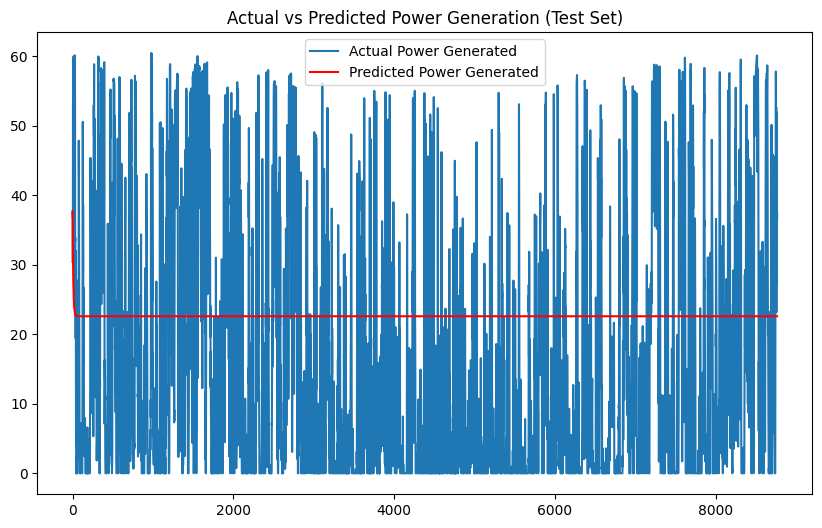

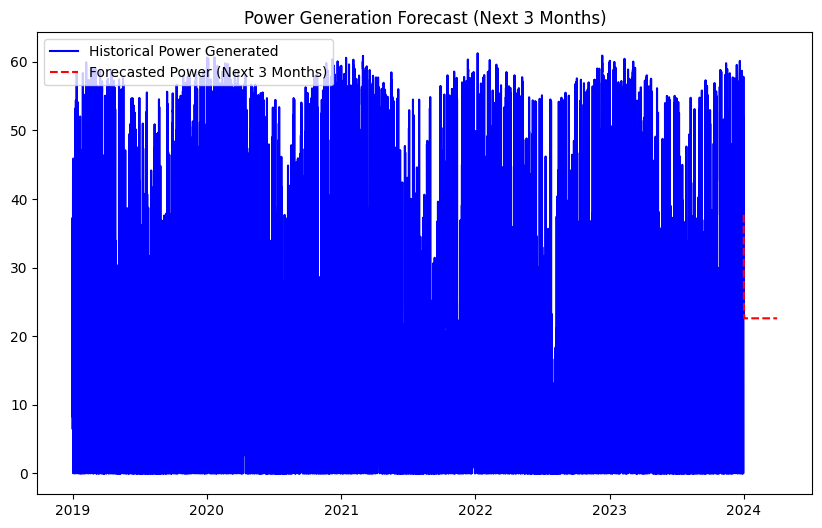

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

target = df['Power generated by system | (MW)'].values
target_scaled = scaler.fit_transform(target.reshape(-1, 1))

train_size = int(len(target_scaled) * 0.8)
train_data, test_data = target_scaled[:train_size], target_scaled[train_size:]

model = ARIMA(train_data, order=(5, 1, 2))  # (p,d,q) order for ARIMA

fitted_model = model.fit()

n_steps = len(df2)
forecast_scaled = fitted_model.forecast(steps=n_steps)

forecast_unscaled = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

forecast_df = pd.DataFrame(forecast_unscaled, index=df2.index, columns=['Predicted_Power'])

y_test_actual = scaler.inverse_transform(test_data.reshape(-1, 1))
y_test_pred_scaled = fitted_model.predict(start=train_size, end=len(target_scaled) - 1)
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))
r2 = r2_score(y_test_actual, y_test_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Power Generated')
plt.plot(y_test_pred, label='Predicted Power Generated', color='red')
plt.title('Actual vs Predicted Power Generation (Test Set)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Power generated by system | (MW)'], label='Historical Power Generated', color='blue')
plt.plot(forecast_df.index, forecast_df['Predicted_Power'], label='Forecasted Power (Next 3 Months)', color='red', linestyle='--')
plt.title('Power Generation Forecast (Next 3 Months)')
plt.legend()
plt.show()

forecast_df.to_csv('arima_forecast_512.csv', index=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 19.168091285091307
R² Score: -0.21683949791509627


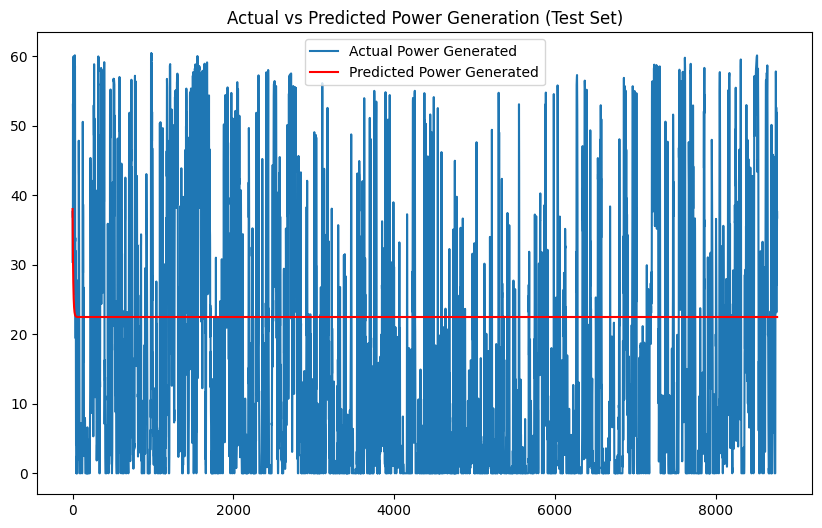

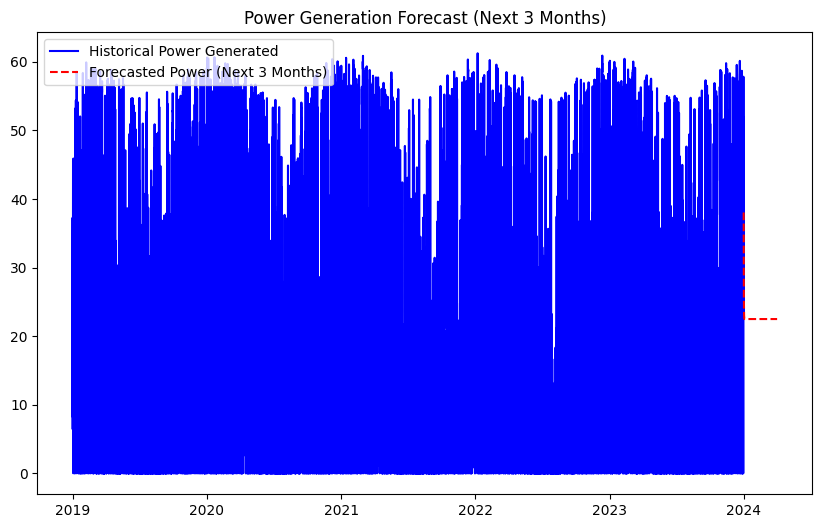

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

scaler = MinMaxScaler(feature_range=(0, 1))

target = df['Power generated by system | (MW)'].values
target_scaled = scaler.fit_transform(target.reshape(-1, 1))

train_size = int(len(target_scaled) * 0.8)
train_data, test_data = target_scaled[:train_size], target_scaled[train_size:]

model = ARIMA(train_data, order=(5, 1, 1))

fitted_model = model.fit()

n_steps = len(df2)
forecast_scaled = fitted_model.forecast(steps=n_steps)

forecast_unscaled = scaler.inverse_transform(forecast_scaled.reshape(-1, 1))

forecast_df = pd.DataFrame(forecast_unscaled, index=df2.index, columns=['Predicted_Power'])

y_test_actual = scaler.inverse_transform(test_data.reshape(-1, 1))
y_test_pred_scaled = fitted_model.predict(start=train_size, end=len(target_scaled) - 1)
y_test_pred = scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))
r2 = r2_score(y_test_actual, y_test_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Power Generated')
plt.plot(y_test_pred, label='Predicted Power Generated', color='red')
plt.title('Actual vs Predicted Power Generation (Test Set)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Power generated by system | (MW)'], label='Historical Power Generated', color='blue')
plt.plot(forecast_df.index, forecast_df['Predicted_Power'], label='Forecasted Power (Next 3 Months)', color='red', linestyle='--')
plt.title('Power Generation Forecast (Next 3 Months)')
plt.legend()
plt.show()

forecast_df.to_csv('arima_forecast_511.csv', index=True)

In [ ]:
# data_file = '/content/whole_merged_properly.xlsx'
# df = pd.read_excel(data_file, parse_dates=True, index_col=0)

# # Make sure the 'Power generated by system | (MW)' column exists and set the target
# target_col = 'Power generated by system | (MW)'
# df.columns = df.columns.str.strip()  # Clean up column names
# target = df[target_col]

# # Ensure the index is a proper datetime index
# df.index = pd.to_datetime(df.index, errors='coerce')

# # Fit the ARIMA model with a high AR term (e.g., AR=5) and low MA term (e.g., MA=1)
# model = ARIMA(target, order=(5, 1, 1))  # Higher AR term, lower MA term
# fitted_model = model.fit()

# # Summary of the model
# print(fitted_model.summary())

# # Forecast the next steps (e.g., next 7 days or adjust based on need)
# forecast_steps = 24 * 7  # 1 week of hourly forecasts
# forecast = fitted_model.get_forecast(steps=forecast_steps)
# forecast_values = forecast.predicted_mean

# # Print forecasted values
# print(forecast_values)

# # Save the forecast to a CSV
# forecast_values.to_csv('arima_forecast.csv', header=True)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

data_file = '/content/whole_merged_properly.xlsx'
df = pd.read_excel(data_file, parse_dates=True)

df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df.set_index('DateTime', inplace=True)
df.index = pd.to_datetime(df.index, errors='coerce')

df.dropna(subset=['Power generated by system | (MW)'], inplace=True)

df.columns = df.columns.str.strip()

target_col = 'Power generated by system | (MW)'
target = df[target_col]

exog = df[['Air temperature | (°C)', 'Wind speed | (m/s)']]

# ARIMAX model (AR=5, I=1, MA=1)
model = SARIMAX(target, exog=exog, order=(5, 1, 1))

fitted_model = model.fit(disp=False)

print(fitted_model.summary())

# Forecast for the next 3 months (2160 hours)
forecast_steps = 24 * 30 * 3  # 3 months of hourly forecasts

exog_forecast = exog.iloc[-1:].values
exog_forecast = pd.DataFrame([exog_forecast[0]] * forecast_steps, columns=exog.columns)

last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')

forecast = fitted_model.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_values = forecast.predicted_mean

forecast_values.index = forecast_index

print(forecast_values)

forecast_values.to_csv('arimax_forecast_511.csv', header=True)

print("Forecasting for the next 3 months completed and saved to 'arimax_forecast_next_3_months.csv'.")

Columns in the dataset:
Index(['DateTime', 'Air temperature | (°C)', 'Pressure | (atm)',
       'Wind speed | (m/s)', 'Power generated by system | (MW)'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:     Power generated by system | (MW)   No. Observations:                43823
Model:                             SARIMAX(5, 1, 1)   Log Likelihood             -112478.581
Date:                              Thu, 17 Oct 2024   AIC                         224975.162
Time:                                      19:34:30   BIC                         225053.353
Sample:                                           0   HQIC                        224999.806
                                            - 43823                                         
Covariance Type:                                opg                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Air temperature | (°C)    -0.0605      0.008     -7.441      0.000      -0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
df.columns

Index(['Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)',
       'Power generated by system | (MW)'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:     Power generated by system | (MW)   No. Observations:                35058
Model:                             SARIMAX(5, 1, 1)   Log Likelihood              -89861.824
Date:                              Fri, 18 Oct 2024   AIC                         179741.647
Time:                                      06:59:54   BIC                         179817.830
Sample:                                           0   HQIC                        179765.912
                                            - 35058                                         
Covariance Type:                                opg                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Air temperature | (°C)    -0.0591      0.009     -6.342      0.000      -0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


R²: 0.8882787760406817
RMSE: 5.808046200645928


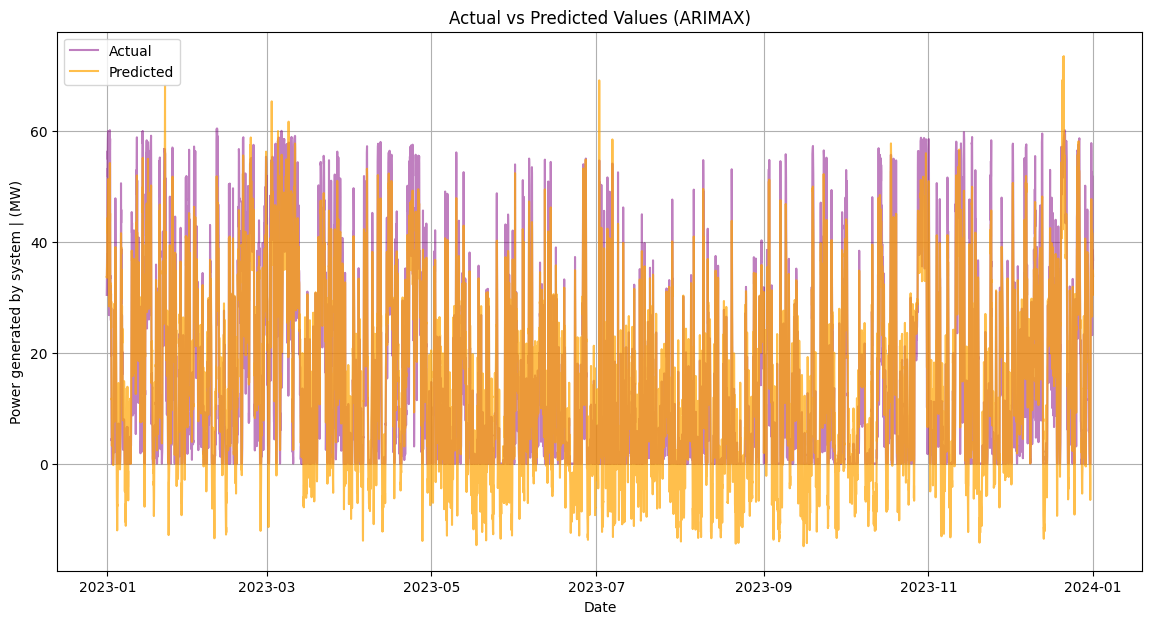

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score

data_file = '/content/whole_merged_properly.xlsx'
df = pd.read_excel(data_file, parse_dates=True)

df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df.set_index('DateTime', inplace=True)

df.index = pd.to_datetime(df.index, errors='coerce')
df.dropna(subset=['Power generated by system | (MW)'], inplace=True)
df.columns = df.columns.str.strip()

target_col = 'Power generated by system | (MW)'
target = df[target_col]

exog = df[['Air temperature | (°C)', 'Wind speed | (m/s)']]
train_size = int(len(df) * 0.8)
train_target = target[:train_size]
train_exog = exog[:train_size]
test_target = target[train_size:]
test_exog = exog[train_size:]

# ARIMAX model (AR=5, I=1, MA=1 )
model = SARIMAX(train_target, exog=train_exog, order=(5, 1, 1))

fitted_model = model.fit(disp=False)
print(fitted_model.summary())

test_steps = len(test_target)
forecast = fitted_model.get_forecast(steps=test_steps, exog=test_exog)
forecast_values = forecast.predicted_mean

r2 = r2_score(test_target, forecast_values)
rmse = np.sqrt(mean_squared_error(test_target, forecast_values))
print(f'R²: {r2}')
print(f'RMSE: {rmse}')

plt.figure(figsize=(14, 7))
plt.plot(test_target.index, test_target, label='Actual', color='purple', alpha=0.5)
plt.plot(test_target.index, forecast_values, label='Predicted', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Values (ARIMAX)')
plt.xlabel('Date')
plt.ylabel('Power generated by system | (MW)')
plt.legend()
plt.grid()
plt.show()

# Forecast for the next 3 months (2160 hours)
forecast_steps = 24 * 30 * 3  # 3 months of hourly forecasts

exog_forecast = exog.iloc[-1:].values
exog_forecast = pd.DataFrame([exog_forecast[0]] * forecast_steps, columns=exog.columns)

last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')

forecast_next = fitted_model.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_values_next = forecast_next.predicted_mean

forecast_values_next.index = forecast_index
# print(forecast_values_next)
forecast_values_next.to_csv('arimax_forecast_511.csv', header=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:     Power generated by system | (MW)   No. Observations:                35058
Model:                             SARIMAX(5, 1, 1)   Log Likelihood              -89894.506
Date:                              Fri, 18 Oct 2024   AIC                         179809.012
Time:                                      07:03:18   BIC                         179893.659
Sample:                                           0   HQIC                        179835.972
                                            - 35058                                         
Covariance Type:                                opg                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Air temperature | (°C)    -0.0389      0.010     -3.978      0.000      -0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


R²: 0.8878436865626868
RMSE: 5.819344699532502


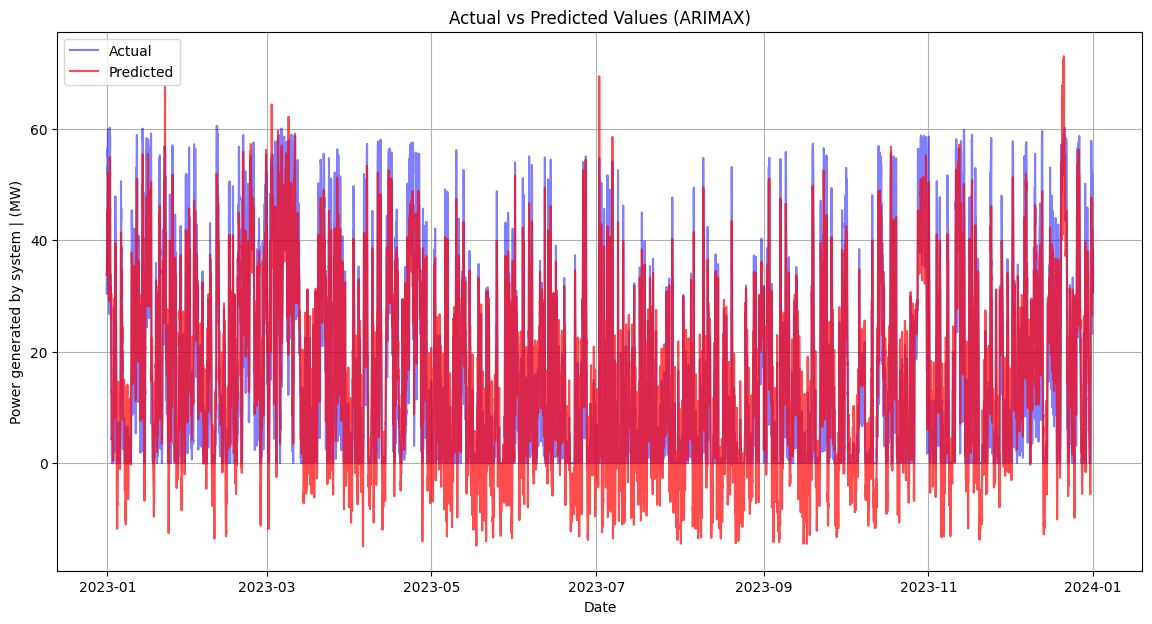

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
exog = df[['Air temperature | (°C)', 'Pressure | (atm)', 'Wind speed | (m/s)']]

train_size = int(len(df) * 0.8)
train_target = target[:train_size]
train_exog = exog[:train_size]
test_target = target[train_size:]
test_exog = exog[train_size:]
model = SARIMAX(train_target, exog=train_exog, order=(5, 1, 1))
fitted_model = model.fit(disp=False)

print(fitted_model.summary())
test_steps = len(test_target)
forecast = fitted_model.get_forecast(steps=test_steps, exog=test_exog)
forecast_values = forecast.predicted_mean

r2 = r2_score(test_target, forecast_values)
rmse = np.sqrt(mean_squared_error(test_target, forecast_values))

print(f'R²: {r2}')
print(f'RMSE: {rmse}')

plt.figure(figsize=(14, 7))
plt.plot(test_target.index, test_target, label='Actual', color='blue', alpha=0.5)
plt.plot(test_target.index, forecast_values, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Values (ARIMAX)')
plt.xlabel('Date')
plt.ylabel('Power generated by system | (MW)')
plt.legend()
plt.grid()
plt.show()

forecast_steps = 24 * 30 * 3

exog_forecast = exog.iloc[-1:].values
exog_forecast = pd.DataFrame([exog_forecast[0]] * forecast_steps, columns=exog.columns)

last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')

forecast_next = fitted_model.get_forecast(steps=forecast_steps, exog=exog_forecast)
forecast_values_next = forecast_next.predicted_mean

forecast_values_next.index = forecast_index

# print(forecast_values_next)

forecast_values_next.to_csv('arimax_forecast_all_511.csv', header=True)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0339 - val_loss: 0.0152
Epoch 2/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0144 - val_loss: 0.0140
Epoch 3/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0125 - val_loss: 0.0131
Epoch 4/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0121 - val_loss: 0.0125
Epoch 5/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0117 - val_loss: 0.0120
Epoch 6/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0116 - val_loss: 0.0121
Epoch 7/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0112 - val_loss: 0.0117
Epoch 8/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0112 - val_loss: 0.0117
Epoch 9/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0113 - val_loss: 0.0119
Epoch 10/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0114 - val_loss: 0.0114
Epoch 11/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0110 - val_loss: 0.0116
Epoch 12/20
1096/1096 ━━━━━━━━━━━━━

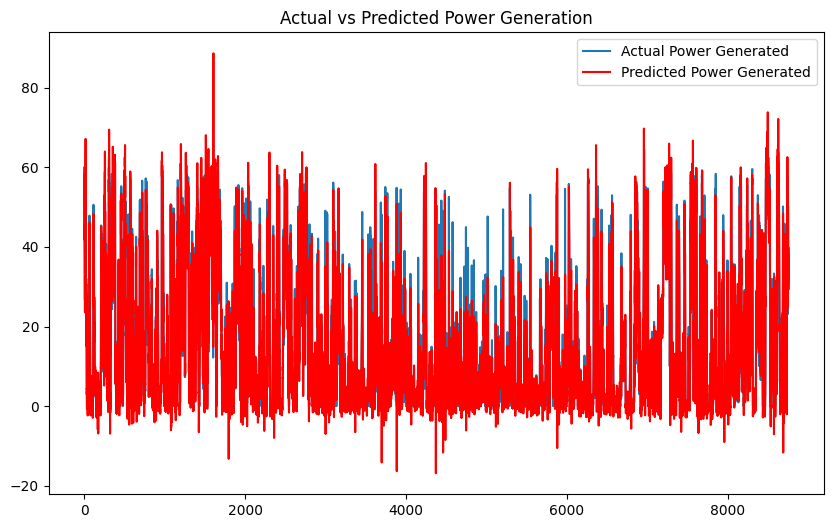

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
target = df['Power generated by system | (MW)'].values
exog = df[['Air temperature | (°C)', 'Wind speed | (m/s)']].values

# Feature scaling (MinMax Scaling) for both target and exogenous variables
scaler_target = MinMaxScaler(feature_range=(0, 1))
scaler_exog = MinMaxScaler(feature_range=(0, 1))

target_scaled = scaler_target.fit_transform(target.reshape(-1, 1))
exog_scaled = scaler_exog.fit_transform(exog)

# Combine the scaled target and exog variables
data_combined = np.concatenate([target_scaled, exog_scaled], axis=1)

# Split into train and test sets (80% train, 20% test)
train_size = int(len(data_combined) * 0.8)
train_data, test_data = data_combined[:train_size], data_combined[train_size:]

# Define a function to create sequences of data for LSTM
def create_sequences(data, seq_length=1):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length, 1:]  # Exogenous variables
        y = data[i + seq_length, 0]  # Target variable (Power generated)
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Create sequences (you can adjust the sequence length)
sequence_length = 10
X_train, y_train = create_sequences(train_data, seq_length=sequence_length)
X_test, y_test = create_sequences(test_data, seq_length=sequence_length)

# Reshape input to 3D for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions and true values back to the original scale
y_pred = scaler_target.inverse_transform(y_pred_scaled)
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and R² score
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Power Generated')
plt.plot(y_pred, label='Predicted Power Generated', color='red')
plt.title('Actual vs Predicted Power Generation')
plt.legend()
plt.show()

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0110
Epoch 2/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0108
Epoch 3/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0112
Epoch 4/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0109
Epoch 5/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0108
Epoch 6/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0111
Epoch 7/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0110
Epoch 8/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0108
Epoch 9/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0110
Epoch 10/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0111
Epoch 11/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0108
Epoch 12/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0110
Epoch 13/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0107
Epoch 14/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0107
Epoch 15/20
1096/1096 ━━━━━━━━━━━

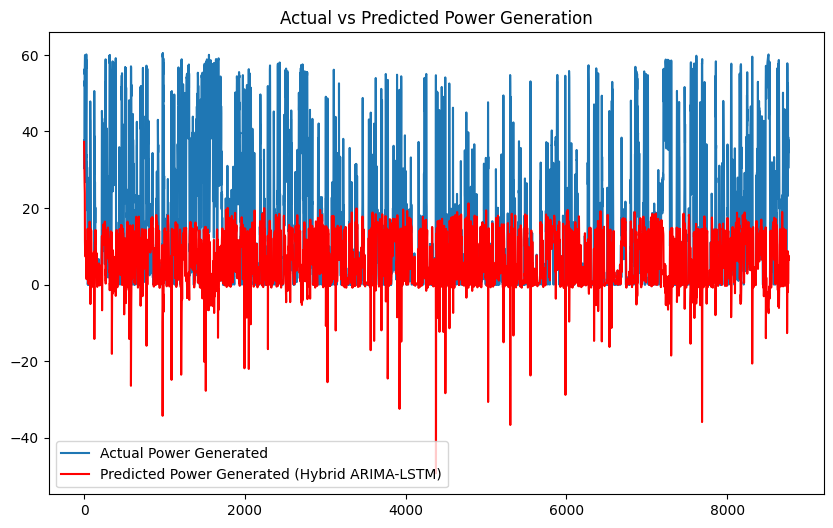

In [ ]:
# Select the target variable (Power generated)
target = df['Power generated by system | (MW)'].values.reshape(-1, 1)

# Feature scaling for target
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split into train and test sets
train_size = int(len(target_scaled) * 0.8)
train, test = target_scaled[:train_size], target_scaled[train_size:]

# Step 1: Train ARIMA model on the training set
model_arima = ARIMA(train, order=(1, 0, 1))
arima_fit = model_arima.fit()

# Step 2: Get ARIMA predictions and calculate residuals on the training set
arima_train_pred = arima_fit.fittedvalues
arima_residuals = train - arima_train_pred.reshape(-1, 1)

# Step 3: Create sequences for LSTM from ARIMA residuals
def create_sequences(data, seq_length=1):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 10  # You can adjust this
X_train, y_train = create_sequences(arima_residuals, seq_length=sequence_length)

# Reshape for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Step 4: Build the LSTM model for residuals
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model on residuals
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Step 5: Make ARIMA predictions on the test set
arima_test_pred = arima_fit.predict(start=train_size, end=len(target_scaled) - 1)

# Calculate residuals for the test set
arima_test_residuals = test - arima_test_pred.reshape(-1, 1)

# Step 6: Make LSTM predictions on the residuals from the ARIMA model
X_test, y_test = create_sequences(arima_test_residuals, seq_length=sequence_length)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm_pred_scaled = model_lstm.predict(X_test)

# Combine ARIMA and LSTM predictions for the final result
lstm_pred = np.concatenate((np.zeros(sequence_length), lstm_pred_scaled.flatten()))
final_pred = arima_test_pred + lstm_pred[:len(arima_test_pred)]

# Inverse scale the predictions and actual values
final_pred_inverse = scaler.inverse_transform(final_pred.reshape(-1, 1))
test_inverse = scaler.inverse_transform(test[:len(final_pred)].reshape(-1, 1))

# Calculate RMSE and R² score
rmse = np.sqrt(mean_squared_error(test_inverse, final_pred_inverse))
r2 = r2_score(test_inverse, final_pred_inverse)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_inverse, label='Actual Power Generated')
plt.plot(final_pred_inverse, label='Predicted Power Generated (Hybrid ARIMA-LSTM)', color='red')
plt.title('Actual vs Predicted Power Generation')
plt.legend()
plt.show()

Epoch 1/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0354 - val_loss: 0.0187
Epoch 2/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0146 - val_loss: 0.0132
Epoch 3/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0127 - val_loss: 0.0127
Epoch 4/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0120 - val_loss: 0.0128
Epoch 5/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0118 - val_loss: 0.0120
Epoch 6/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0115 - val_loss: 0.0124
Epoch 7/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0111 - val_loss: 0.0121
Epoch 8/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0111 - val_loss: 0.0122
Epoch 9/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0114 - val_loss: 0.0118
Epoch 10/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0112 - val_loss: 0.0116
Epoch 11/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0108 - val_loss: 0.0124
Epoch 12/20
1096/1096 ━━━━━━━

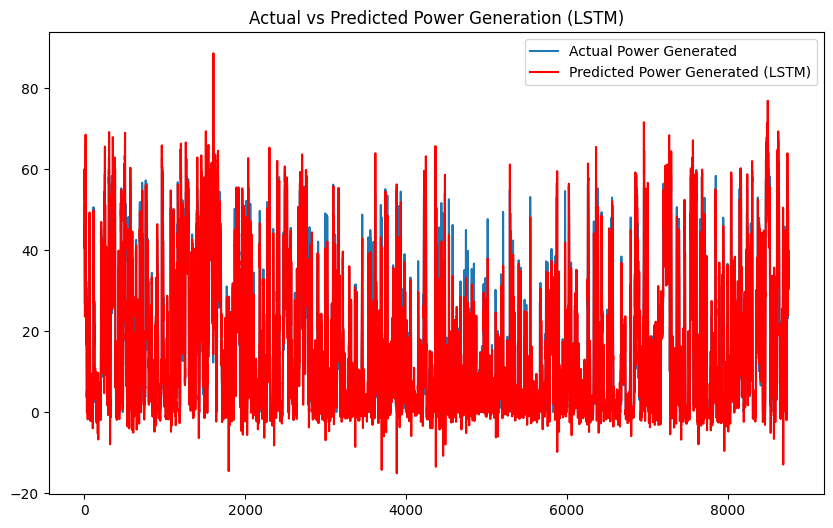

Length of forecast_arimax: 8765
Length of y_test_actual: 8755


ValueError: Found input variables with inconsistent numbers of samples: [8755, 8765]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import statsmodels.api as sm

# Assuming 'df' is already defined and contains the necessary data
target = df['Power generated by system | (MW)'].values
exog = df[['Air temperature | (°C)', 'Wind speed | (m/s)']].values

# Feature scaling for both target and exogenous variables
scaler_target = MinMaxScaler(feature_range=(0, 1))
scaler_exog = MinMaxScaler(feature_range=(0, 1))

target_scaled = scaler_target.fit_transform(target.reshape(-1, 1))
exog_scaled = scaler_exog.fit_transform(exog)

# Combine the scaled target and exogenous variables
data_combined = np.concatenate([target_scaled, exog_scaled], axis=1)

# Split into train and test sets (80% train, 20% test)
train_size = int(len(data_combined) * 0.8)
train_data, test_data = data_combined[:train_size], data_combined[train_size:]

# Function to create sequences of data for LSTM
def create_sequences(data, seq_length=1):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length, 1:]  # Exogenous variables
        y = data[i + seq_length, 0]  # Target variable
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Create sequences
sequence_length = 10
X_train, y_train = create_sequences(train_data, seq_length=sequence_length)
X_test, y_test = create_sequences(test_data, seq_length=sequence_length)

# Reshape input to 3D for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions for the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions and true values back to the original scale
y_pred_lstm = scaler_target.inverse_transform(y_pred_scaled)
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and R² score for LSTM
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, y_pred_lstm))
r2_lstm = r2_score(y_test_actual, y_pred_lstm)

print(f'LSTM RMSE: {rmse_lstm}')
print(f'LSTM R² Score: {r2_lstm}')

# Plotting actual vs predicted for LSTM
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Power Generated')
plt.plot(y_pred_lstm, label='Predicted Power Generated (LSTM)', color='red')
plt.title('Actual vs Predicted Power Generation (LSTM)')
plt.legend()
plt.show()

# Fit the ARIMAX model using the full target_scaled and the corresponding exogenous variables
model_arimax = sm.tsa.ARIMA(target_scaled, order=(5, 1, 0), exog=exog_scaled[:len(target_scaled)])
model_arimax_fit = model_arimax.fit()

# Ensure correct forecasting
forecast_steps = len(test_data)
forecast_arimax = model_arimax_fit.forecast(steps=forecast_steps, exog=exog_scaled[train_size:train_size + forecast_steps])

# Check shapes
print(f"Length of forecast_arimax: {len(forecast_arimax)}")
print(f"Length of y_test_actual: {len(y_test_actual)}")

# Inverse transform ARIMAX predictions
forecast_arimax_inverse = scaler_target.inverse_transform(forecast_arimax.reshape(-1, 1))

# Inverse transform ARIMAX predictions
forecast_arimax_inverse = scaler_target.inverse_transform(forecast_arimax.reshape(-1, 1))

# Calculate RMSE and R² score for ARIMAX
rmse_arimax = np.sqrt(mean_squared_error(y_test_actual, forecast_arimax_inverse))
r2_arimax = r2_score(y_test_actual, forecast_arimax_inverse)

print(f'ARIMAX RMSE: {rmse_arimax}')
print(f'ARIMAX R² Score: {r2_arimax}')

# Plotting actual vs predicted for ARIMAX
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Power Generated')
plt.plot(forecast_arimax_inverse, label='Predicted Power Generated (ARIMAX)', color='green')
plt.title('Actual vs Predicted Power Generation (ARIMAX)')
plt.legend()
plt.show()

# Forecasting for the next 3 months with LSTM
last_sequence = data_combined[-sequence_length:, 1:]  # Last sequence of exogenous variables
lstm_predictions = []

# Number of hours in 3 months (approx)
forecast_steps = 24 * 30 * 3  # Adjust as necessary for your forecast frequency

# Prepare exogenous data for forecasting
exog_future = exog_scaled[-sequence_length:]  # Get the last exogenous values

for _ in range(forecast_steps):
    # Create input for LSTM
    last_sequence_input = last_sequence.reshape((1, last_sequence.shape[0], last_sequence.shape[1]))

    # Make prediction
    next_pred_scaled = model.predict(last_sequence_input)
    next_pred = scaler_target.inverse_transform(next_pred_scaled)  # Inverse transform to original scale
    lstm_predictions.append(next_pred[0, 0])  # Store the prediction

    # Update last sequence for next prediction
    last_sequence = np.append(last_sequence, next_pred_scaled, axis=0)[1:]

# Convert predictions to a DataFrame for better handling
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')
forecast_df_lstm = pd.DataFrame(lstm_predictions, index=forecast_index, columns=['LSTM Predicted Power (MW)'])

# Forecasting for the next 3 months with ARIMAX (optional)
exog_future_arimax = exog_scaled[-forecast_steps:]  # Ensure exogenous inputs for ARIMAX
forecast_arimax_next = model_arimax_fit.forecast(steps=forecast_steps, exog=exog_future_arimax)
forecast_arimax_next_inverse = scaler_target.inverse_transform(forecast_arimax_next.reshape(-1, 1))
forecast_df_arimax = pd.DataFrame(forecast_arimax_next_inverse, index=forecast_index, columns=['ARIMAX Predicted Power (MW)'])

# Combine both forecasts into one DataFrame
combined_forecast_df = pd.concat([forecast_df_lstm, forecast_df_arimax], axis=1)

# Save the combined forecasts to a CSV file
combined_forecast_df.to_csv('combined_forecast_next_3_months.csv', header=True)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_df_lstm.index, forecast_df_lstm['LSTM Predicted Power (MW)'], label='LSTM Forecasted Power Generation', color='orange')
plt.plot(forecast_df_arimax.index, forecast_df_arimax['ARIMAX Predicted Power (MW)'], label='ARIMAX Forecasted Power Generation', color='green')
plt.title('Power Generation Forecast for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Power Generation (MW)')
plt.legend()
plt.show()

Epoch 1/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0358 - val_loss: 0.0177
Epoch 2/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0145 - val_loss: 0.0133
Epoch 3/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0132 - val_loss: 0.0149
Epoch 4/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0123 - val_loss: 0.0129
Epoch 5/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0118 - val_loss: 0.0125
Epoch 6/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0116 - val_loss: 0.0120
Epoch 7/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0116 - val_loss: 0.0124
Epoch 8/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0114 - val_loss: 0.0119
Epoch 9/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0118 - val_loss: 0.0116
Epoch 10/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0112 - val_loss: 0.0115
Epoch 11/20
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0109 - val_loss: 0.0117
Epoch 12/20
1096/1096 ━

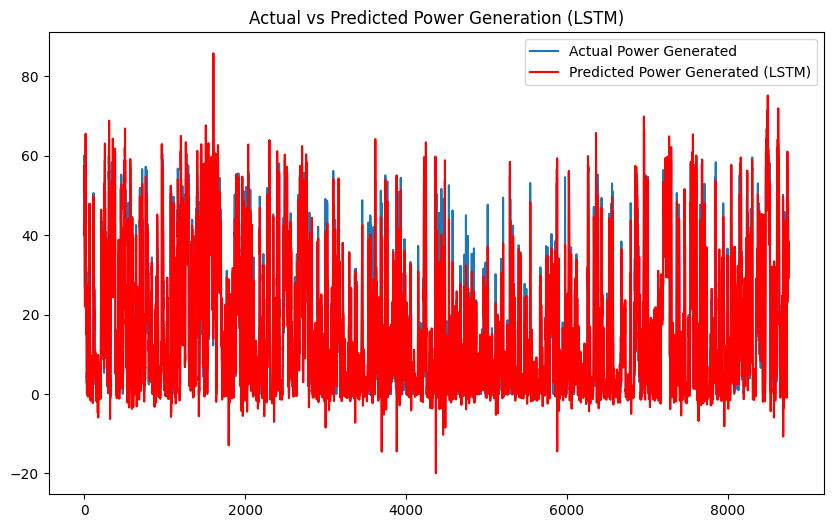

ARIMAX RMSE: 19.261598757988
ARIMAX R² Score: -0.23214392856787947


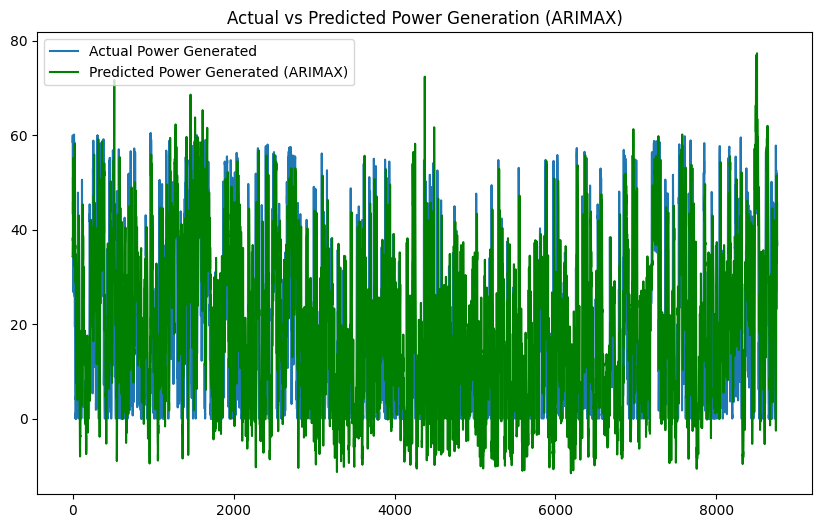

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

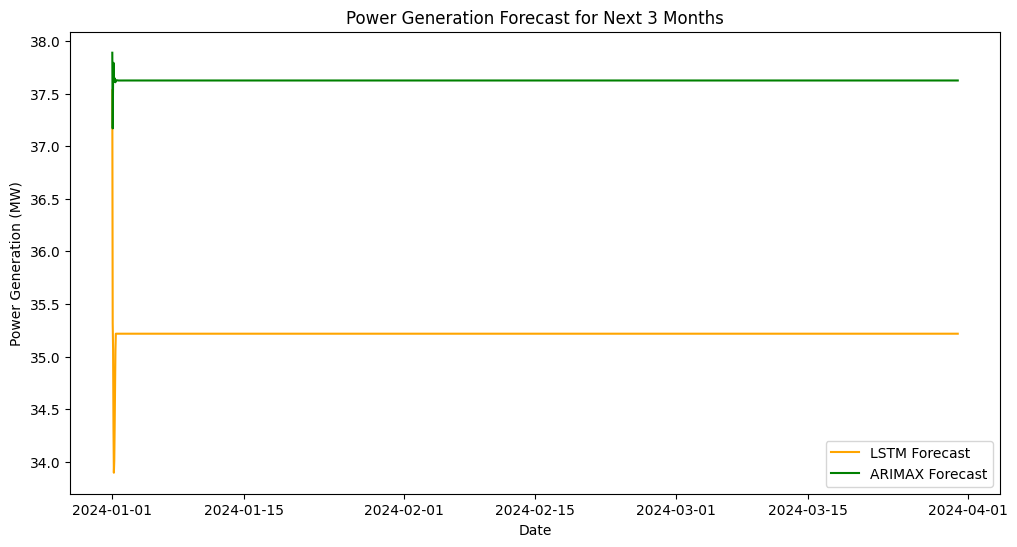

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import statsmodels.api as sm

target = df['Power generated by system | (MW)'].values
exog = df[['Air temperature | (°C)', 'Wind speed | (m/s)']].values

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaler_exog = MinMaxScaler(feature_range=(0, 1))

target_scaled = scaler_target.fit_transform(target.reshape(-1, 1))
exog_scaled = scaler_exog.fit_transform(exog)

data_combined = np.concatenate([target_scaled, exog_scaled], axis=1)

train_size = int(len(data_combined) * 0.8)
train_data, test_data = data_combined[:train_size], data_combined[train_size:]

def create_sequences(data, seq_length=1):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length, 1:]  # Exogenous variables
        y = data[i + seq_length, 0]  # Target variable
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 10
X_train, y_train = create_sequences(train_data, seq_length=sequence_length)
X_test, y_test = create_sequences(test_data, seq_length=sequence_length)

# Reshape input to 3D for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred_scaled = model.predict(X_test)

y_pred_lstm = scaler_target.inverse_transform(y_pred_scaled)
y_test_actual = scaler_target.inverse_transform(y_test.reshape(-1, 1))

rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, y_pred_lstm))
r2_lstm = r2_score(y_test_actual, y_pred_lstm)

print(f'LSTM RMSE: {rmse_lstm}')
print(f'LSTM R² Score: {r2_lstm}')

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Power Generated')
plt.plot(y_pred_lstm, label='Predicted Power Generated (LSTM)', color='red')
plt.title('Actual vs Predicted Power Generation (LSTM)')
plt.legend()
plt.show()

train_target = target_scaled[:train_size]
train_exog = exog_scaled[:train_size]
test_exog = exog_scaled[train_size:train_size + len(y_test_actual)]

model_arimax = sm.tsa.ARIMA(train_target, order=(5, 1, 0), exog=train_exog)
model_arimax_fit = model_arimax.fit()

forecast_arimax = model_arimax_fit.forecast(steps=len(y_test_actual), exog=test_exog)

forecast_arimax_inverse = scaler_target.inverse_transform(forecast_arimax.reshape(-1, 1))

rmse_arimax = np.sqrt(mean_squared_error(y_test_actual, forecast_arimax_inverse))
r2_arimax = r2_score(y_test_actual, forecast_arimax_inverse)

print(f'ARIMAX RMSE: {rmse_arimax}')
print(f'ARIMAX R² Score: {r2_arimax}')

# Plotting actual vs predicted for ARIMAX
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Power Generated')
plt.plot(forecast_arimax_inverse, label='Predicted Power Generated (ARIMAX)', color='green')
plt.title('Actual vs Predicted Power Generation (ARIMAX)')
plt.legend()
plt.show()

forecast_steps = 24 * 30 * 3
current_sequence = data_combined[-sequence_length:, 1:].copy()
lstm_predictions = []

for _ in range(forecast_steps):
    current_sequence_reshaped = current_sequence.reshape((1, sequence_length, 2))
    next_pred_scaled = model.predict(current_sequence_reshaped)
    next_pred = scaler_target.inverse_transform(next_pred_scaled)[0, 0]
    lstm_predictions.append(next_pred)
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = current_sequence[-2]
exog_future = np.repeat(exog_scaled[-1:], forecast_steps, axis=0)
forecast_arimax_future = model_arimax_fit.forecast(steps=forecast_steps, exog=exog_future)
forecast_arimax_future_inverse = scaler_target.inverse_transform(forecast_arimax_future.reshape(-1, 1))

forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')
forecast_df = pd.DataFrame({
    'LSTM Predicted Power (MW)': lstm_predictions,
    'ARIMAX Predicted Power (MW)': forecast_arimax_future_inverse.flatten()
}, index=forecast_index)

forecast_df.to_csv('hybrid.csv')

plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['LSTM Predicted Power (MW)'],
         label='LSTM Forecast', color='orange')
plt.plot(forecast_df.index, forecast_df['ARIMAX Predicted Power (MW)'],
         label='ARIMAX Forecast', color='green')
plt.title('Power Generation Forecast for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Power Generation (MW)')
plt.legend()
plt.show()

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [ ]:
df.head()

,Air temperature | (°C),Pressure | (atm),Wind speed | (m/s),Power generated by system | (MW)
DateTime,,,,
2019-01-01 01:00:00,10.926,0.979103,9.014,33.6881
2019-01-01 02:00:00,9.919,0.979566,9.428,37.2619
2019-01-01 03:00:00,NaN,NaN,NaN,NaN
2019-01-01 04:00:00,NaN,NaN,NaN,NaN
2019-01-01 05:00:00,NaN,NaN,NaN,NaN
